# Title
`Mall Customers Clustering Analysis`

## Introduction
In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in K
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)

## Purpose
`Customers clustering analysis`

## Methodology
`EDA | (Data Preprocessing / ML Modeling) | Model Tuning | Performance evaluation`

**`ML Modeling :`** 

    Clustering: k means, Agglomerative, Gaussian mixture, Affinity propagation, DBSCAN
    Dimensionality reduction: PCA, SVD, kernel PCA, NMF, t-SNE, LDA

For each algorithm, try to understand how it works and when it is good to use it. Optional: try to understand the classic loss function for clustering (Inertia)


## WIP - improvements
`NB!` Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [91]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Scklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA as RandomizedPCA

from sklearn.metrics import silhouette_score

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries


# Data import
We retrieve all the required data for the analysis.

In [118]:
df = pd.read_csv('../data/mall_customers.csv')

# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

## Summarize data

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    200
dtype: int64

## Data Visualisation

### Multivariate Analysis

**Displot**

AttributeError: module 'matplotlib' has no attribute 'title'

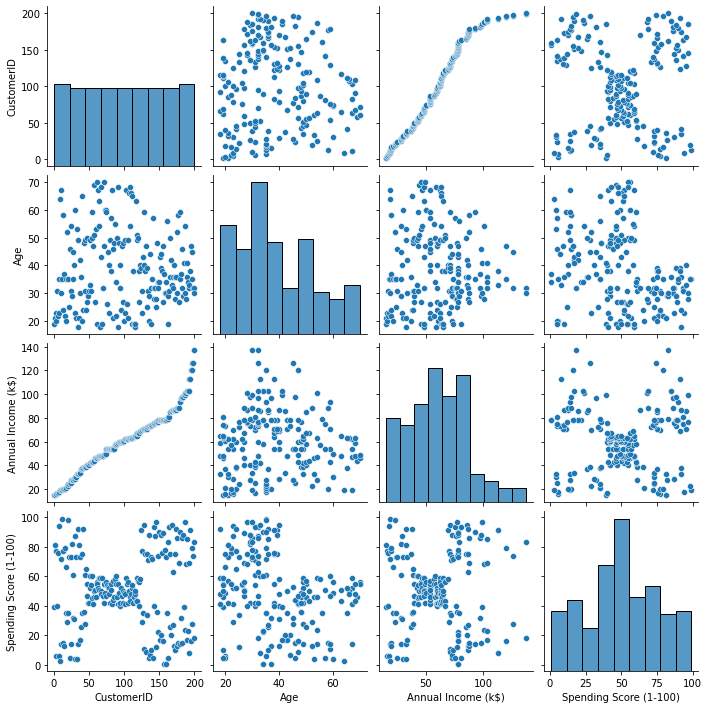

In [9]:
sns.pairplot(df)
plt.title('Pairplot', fontsize = 20)
plt.show()

**Heatmap**

AttributeError: module 'matplotlib' has no attribute 'title'

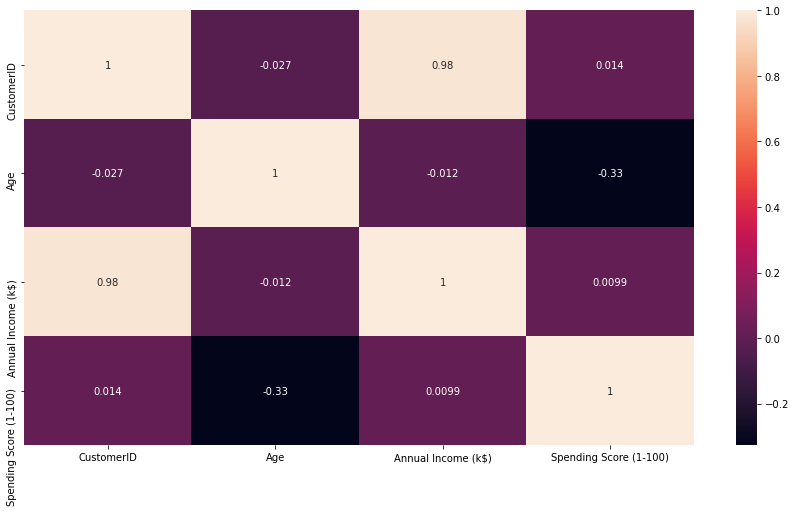

In [10]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

It seams like there's only a one really strong correlation between annual income and customerID, but among all the features is not the case. 

### Bivariate Analysis

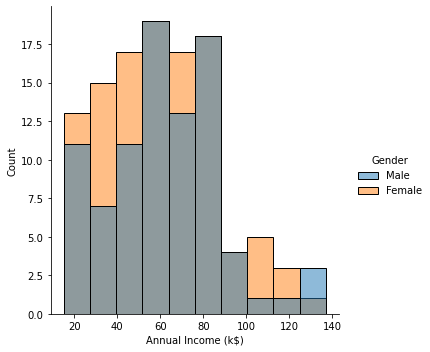

In [22]:
sns.displot(data=df, x="Annual Income (k$)", hue="Gender")

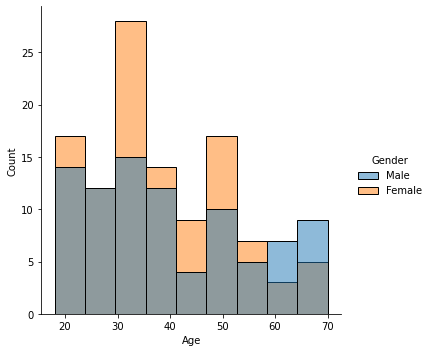

In [20]:
sns.displot(data=df, x="Age", hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

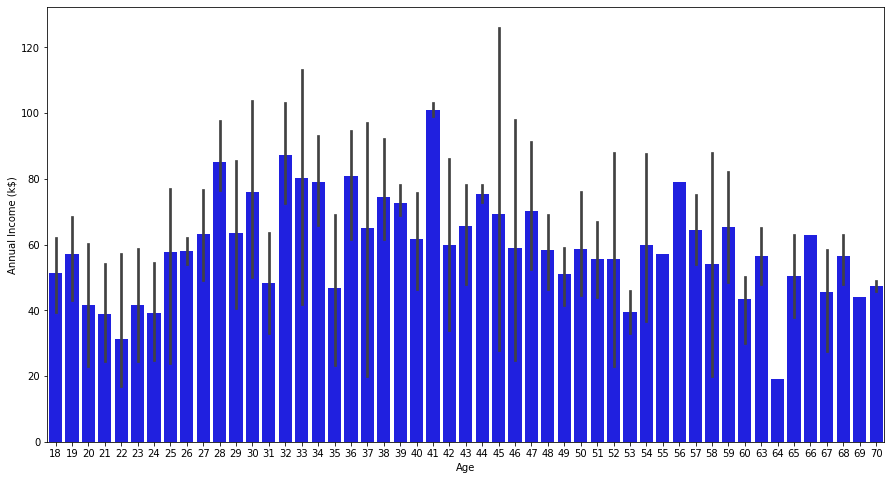

In [25]:
sns.barplot(x="Age", y="Annual Income (k$)", data=df, color="b")

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

## Prepare Problem

We are trying to cluster these customers by finding pattern among the data.
We'll begin by choosing randomizedPCA scklearn model.

## Feature Engineering

**Encoding**   
We'll need to encode categorical features before starting modeling, using dummy get_dummies() pandas method

In [119]:
# drop CustomerID indexing feature
df = df.drop(['CustomerID'], axis=1)

# identify categorical features
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [120]:
# encoding Age feature
dummy_sex = pd.get_dummies(df.Gender)
print(dummy_sex)

     Female  Male
0         0     1
1         0     1
2         1     0
3         1     0
4         1     0
..      ...   ...
195       1     0
196       1     0
197       0     1
198       0     1
199       0     1

[200 rows x 2 columns]


In [121]:
# merging encoded feature instances into the scaled dataframe
df = pd.merge(
    left=df,
    right=dummy_sex,
    left_index=True,
    right_index=True,
    )

In [122]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0
...,...,...,...,...,...,...
195,Female,35,120,79,1,0
196,Female,45,126,28,1,0
197,Male,32,126,74,0,1
198,Male,32,137,18,0,1


**Scaling**   
We'll perform scaling on quantitative features.

In [123]:
# define featues to be scaled
ftrs = df.drop(['Female', 'Male', 'Gender'], axis=1).columns

X_scaled = pd.DataFrame(StandardScaler().fit_transform(df[ftrs]), columns=ftrs)
X_scaled = X_scaled.join(df[['Female', 'Male']])
X_scaled

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1,0
196,0.441365,2.497807,-0.861839,1,0
197,-0.491602,2.497807,0.923953,0,1
198,-0.491602,2.917671,-1.250054,0,1


## ML Modeling

### KMeans

C:\Users\adils\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


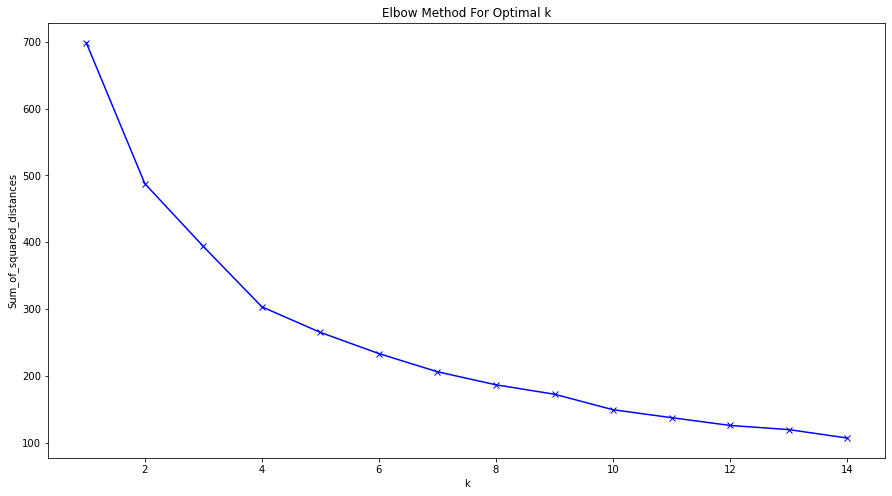

In [124]:
# plot Elbow chart to identify optimal k clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [126]:
X_scaled

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1,0
196,0.441365,2.497807,-0.861839,1,0
197,-0.491602,2.497807,0.923953,0,1
198,-0.491602,2.917671,-1.250054,0,1


In [127]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0
...,...,...,...,...,...,...
195,Female,35,120,79,1,0
196,Female,45,126,28,1,0
197,Male,32,126,74,0,1
198,Male,32,137,18,0,1


In the plot above the elbow is at k=4, indicating optimal k for this dataset is 4.

In [128]:
# creates 4 clusters using k-means clustering method
k_cluster = KMeans(4)
kmeans.fit_predict(X_scaled)
# create new feature in which adding clustered instances
df['clusters'] = kmeans.predict(X_scaled)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male,clusters
0,Male,19,15,39,0,1,2
1,Male,21,15,81,0,1,2
2,Female,20,16,6,1,0,2
3,Female,23,16,77,1,0,2
4,Female,31,17,40,1,0,2
...,...,...,...,...,...,...,...
195,Female,35,120,79,1,0,1
196,Female,45,126,28,1,0,0
197,Male,32,126,74,0,1,1
198,Male,32,137,18,0,1,0


**Fit the data and get the labels**

In [130]:
k_cluster.fit(X_scaled)
k_labels = k_cluster.labels_

**How does the clusters relate with our variables?**

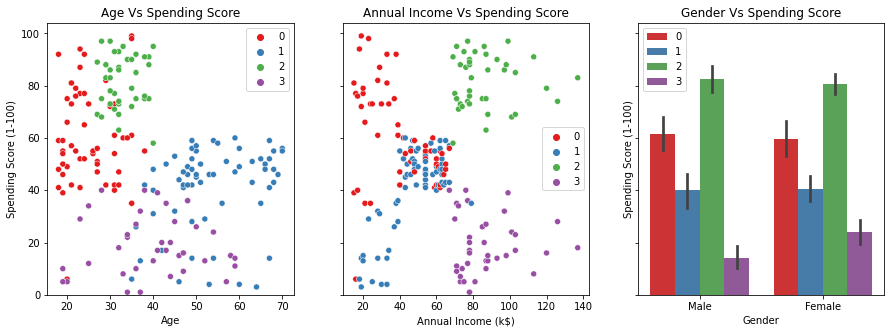

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0], x=df.Age, y=df['Spending Score (1-100)'], hue=k_labels, palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=k_labels, palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender, y=df['Spending Score (1-100)'], hue=k_labels, palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

In [137]:
# define customers count per cluster
df['kmean'] = k_labels

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male,clusters,kmean
0,Male,19,15,39,0,1,2,0
1,Male,21,15,81,0,1,2,0
2,Female,20,16,6,1,0,2,0
3,Female,23,16,77,1,0,2,0
4,Female,31,17,40,1,0,2,0
...,...,...,...,...,...,...,...,...
195,Female,35,120,79,1,0,1,2
196,Female,45,126,28,1,0,0,3
197,Male,32,126,74,0,1,1,2
198,Male,32,137,18,0,1,0,3


In [151]:
# dataframe containing customers count per cluster
clusters_df = pd.DataFrame(df['kmean'].value_counts())
clusters_df

,kmean
1,65
0,57
2,40
3,38


----------